# 4.3 배열을 사용한 데이터 처리

> 백터화 : 배열연산을 사용해서 반복문을 명시적으로 제거하는 기법

np.meshgrid 함수는 2개의 1차원 배열을 받아 가능한 한 모든(x, y)짝을 만들 수 있는 2차원 배열 2개를 반환

In [2]:
import numpy as np

In [4]:
points = np.arange(-5, 5, 0.01) #1000개 동일한 크기의 points

In [5]:
xs, ys = np.meshgrid(points, points)

In [6]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [7]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ..., 
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

그리드 상의 두 포인트를 가지고 간단하게 계산을 적용할 수 있다.

In [129]:
import matplotlib.pyplot as plt

In [133]:
%matplotlib inline

In [11]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [12]:
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

<matplotlib.colorbar.Colorbar instance at 0x10f29b908>

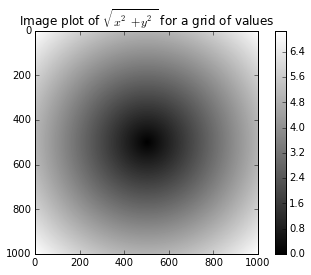

In [17]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values"); 
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

### 4.3.1 배열연산으로 조건절 표현하기

**numpy.where**함수는 'x if 조건 else y'같은 삼항식의 백터화 된 버전이다.

In [18]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

cond 값이 True일 때, xarr의 값이나 yarr의 값을 취하고 싶다면 \*리스트 내포를 이용해서 다음처럼 작성할 수 있다.
> 리스트 내포 : for/in과 if 키워드를 사용하여 논리구조에 따른 리스트를 생성하는 강력한 방법<br />리스트 이름 = [변수 for 변수 in 범위 if 조건]

In [19]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

In [20]:
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

순수 파이썬으로 수행되기 떄문에 큰 배열을 빠르게 처리하지 못한다는 것과 다차원 배열에서는 사용할 수 없다는 문제가 있다. 하지만 np.where을 사용하면 아주 간결하게 작성할 수 있다.

In [21]:
result = np.where(cond, xarr, yarr)

In [22]:
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

* np.where에 두번째와 세번째 인자는 배열이 아니어도 상관이 없다.<br />
  (둘 중 하나 혹은 둘 다 스칼라값이라도 동작한다)
* 데이터 분석에서 일반적인 where의 사용은 다른 배열에 기반한 새로운 배열을 생성한다.

In [23]:
arr = np.random.randn(4, 4)
arr

array([[-0.07095348, -1.42889395,  0.29392748, -0.91666547],
       [-1.16542974, -0.02167686,  0.12756312,  0.90524465],
       [ 2.20612104, -0.59604074, -1.15625809,  1.41752523],
       [ 0.48789522, -0.71978962,  0.74693689,  1.51652298]])

In [24]:
np.where(arr > 0, 2, -2)

array([[-2, -2,  2, -2],
       [-2, -2,  2,  2],
       [ 2, -2, -2,  2],
       [ 2, -2,  2,  2]])

In [26]:
arr2 = np.where(arr > 0, 2, arr)
arr2

array([[-0.07095348, -1.42889395,  2.        , -0.91666547],
       [-1.16542974, -0.02167686,  2.        ,  2.        ],
       [ 2.        , -0.59604074, -1.15625809,  2.        ],
       [ 2.        , -0.71978962,  2.        ,  2.        ]])

In [27]:
arr

array([[-0.07095348, -1.42889395,  0.29392748, -0.91666547],
       [-1.16542974, -0.02167686,  0.12756312,  0.90524465],
       [ 2.20612104, -0.59604074, -1.15625809,  1.41752523],
       [ 0.48789522, -0.71978962,  0.74693689,  1.51652298]])

In [28]:
cond1 = np.array([True, False, False, True, False, True, True])
cond2 = np.array([False, False, True, True, False, True, False])

In [34]:
result = []
for i in range(7):
    if cond1[i] and cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)
result

[1, 3, 2, 0, 3, 0, 1]

중첩된 where를 사용해서 다음 where문은 앞의 for반복문과 같은 결과를 얻는다.<br />
```python
np.where(cond1 & cond2, 0, 
        np.where(cond1, 1, 
                np.where(cond2, 2, 3)))
```
한번에 접근하면 이해하기 어려우므로 한 부분씩 접근해 보도록 하자.

In [36]:
cond2Result = np.where(cond2, 2, 3)
cond2Result

array([3, 3, 2, 2, 3, 2, 3])

In [37]:
cond1Result = np.where(cond1, 1, cond2Result)
cond1Result

array([1, 3, 2, 1, 3, 1, 1])

In [38]:
condAndResult = np.where(cond1 & cond2, 0, cond1Result)
condAndResult

array([1, 3, 2, 0, 3, 0, 1])

### 4.3.2 수학 메서드와 통계 메서드
배열 전체 혹은 배열에서 한 축에 따르는 자료에 대한 통계를 계산하기 위한 수학 함수는 배열 메서드로 사용할 수 있다. 전체의 합(sum) 이나 평균(mean), 표준편차(std)는 NumPy의 최상위 함수를 이용하거나 배열의 인스턴스 메서드를 사용해서 구할 수 있다.

In [10]:
arr = np.random.randn(5,4)
arr

array([[-0.73170677, -0.68170489, -1.18447652, -0.73811208],
       [ 0.60175601,  0.90068891, -1.71891918, -1.36690022],
       [ 0.89504403,  0.77484609, -0.9985186 ,  1.48041936],
       [-0.88492119, -0.07570295, -0.44863054,  0.26920045],
       [ 0.19162111,  1.04223636,  1.22567314, -1.12305744]])

In [18]:
arr.mean() #배열의 인스턴스 메서드 인듯?

-0.12855824586772138

In [7]:
np.mean(arr) #NumPy의 최상위 함수?

-0.022802607816834047

In [8]:
arr.sum()

-0.45605215633668095

mean이나 sum같은 함수는 선택적으로 axis(축) 인자를 받아 해당 axis에 대한 통계를 계산하고 한 차수 낮은 배열을 반환한다.

In [11]:
arr.mean(axis = 1)

array([-0.83400006, -0.39584362,  0.53794772, -0.28501356,  0.33411829])

In [29]:
arr.mean(0)

array([ 0.01435864,  0.3920727 , -0.62497434, -0.29568999])

In [30]:
arr.sum(1) #axis의 값이 0일때는 세로값을 계산, 1일때는 가로값을 계산

array([-3.33600026, -1.58337449,  2.15179088, -1.14005423,  1.33647318])

In [33]:
arr = np.array([[1,2,3], [4,5,6], [7,8,9]])
arr.cumsum(0) #누적합

array([[ 1,  2,  3],
       [ 5,  7,  9],
       [12, 15, 18]])

In [34]:
arr.cumprod(1) #누적곱

array([[  1,   2,   6],
       [  4,  20, 120],
       [  7,  56, 504]])

* sum : 배열 전체 혹은 축에 대한 모든 원소의 합을 계산한다. 크기가 0인 배열에 대한 sum의 결과는 0이다.
* mean : 산술평균을 구한다. 크기가 0인 배열에 대한 mean의 결과는 NaN이다.
* std, var : 표준편차(std), 분산(var). 선택적으로 자유도를 줄 수 있으며 분모의 기본값은 n
* min, max : 최소, 최대 값
* argmin, argmax : 최소, 최대 원소의 색인 값
* cumsum : 각 원소의 누적 합
* cumprod : 각 원소의 누적 곱

### 4.3.3 불리언 배열을 위한 메서드
불리언 값은 1(True), 0(False)으로 취급. 불리언 배열에 대한 sum메서드 실행시 True인 원소의 갯수를 반환

In [40]:
arr = np.random.randn(100)
arr

array([ 0.77205941, -0.76949932, -0.46082169, -0.62219279, -2.67561773,
        1.17222727,  0.63764881, -0.99513377,  0.11280903,  0.39555801,
       -0.37685098,  1.25370595,  0.17786046,  1.91449207, -0.45113469,
       -0.45761585,  0.69862309,  0.89919062, -1.51580728,  0.93364537,
        1.1608759 , -1.40397758,  0.27864873,  0.29839228, -0.83752782,
       -0.18611868,  1.39870009, -0.03090068, -0.62081449,  0.75040769,
       -0.39467248,  1.43085069, -1.30215189,  0.11894502,  1.13544164,
        1.08159634,  0.48614927,  0.10780614,  0.30550562, -0.11006001,
       -0.30259172, -1.8748722 ,  0.46967089, -1.26414298,  0.56420133,
        0.26488839,  0.72836179,  0.19610379,  0.98435633, -0.34163215,
       -1.16399088, -0.19841868,  0.79849696,  0.8939176 , -0.35464979,
        0.24137357,  0.35273504, -0.06034855,  0.54230927,  0.15984897,
       -0.39012019,  1.0015743 ,  0.09733237, -1.51570559, -1.46593942,
       -0.33418231,  1.75431287, -1.46224655, -1.12250987, -1.38

In [42]:
(arr > 0)

array([ True, False, False, False, False,  True,  True, False,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False, False, False,  True, False, False, False, False,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False,  True,  True,  True, False, False, False,  True], dtype=bool)

In [44]:
(arr > 0).sum()

52

any, all 메서드는 불리언 배열에 사용할 때 특히 유용

In [45]:
bools = np.array([False, False, True, False])

In [47]:
bools.any() #일반적인 프로그래밍 언어에서 ||과 비슷

True

In [48]:
bools.all() #일반적인 프로그래밍 언어에서 &&와 비슷

False

> 이 메서드는 불리언 배열이 아니어도 동작, 0이 아는 원소는 모두 True로 간주한다.

### 4.3.4 정렬
sort메서드를 이용해서 정렬 가능

In [49]:
arr = np.random.randn(8)
arr

array([-0.85620457, -1.44443613, -1.48453765, -1.25891038,  0.78523082,
        0.0510991 ,  0.52516216,  1.784005  ])

In [56]:
arr.sort()
arr

array([-1.48453765, -1.44443613, -1.25891038, -0.85620457,  0.0510991 ,
        0.52516216,  0.78523082,  1.784005  ])

In [59]:
arr = np.random.randn(5, 3)
arr

array([[ 1.47151878, -0.15964197, -0.3217144 ],
       [-1.17415174,  0.23978256,  1.15408474],
       [-0.40750421,  1.95050552, -0.38561614],
       [-0.59955359, -1.43464874, -0.94669879],
       [ 1.2738943 , -0.99148472,  0.94013187]])

In [61]:
arr.sort(1)
arr

array([[-0.3217144 , -0.15964197,  1.47151878],
       [-1.17415174,  0.23978256,  1.15408474],
       [-0.40750421, -0.38561614,  1.95050552],
       [-1.43464874, -0.94669879, -0.59955359],
       [-0.99148472,  0.94013187,  1.2738943 ]])

In [64]:
arr2 = np.random.randn(3,4)
arr2

array([[-0.23595887,  0.40706683,  0.10229935, -1.6497822 ],
       [ 0.53241279,  1.78602131, -0.53825032,  0.96823907],
       [-0.94840438,  1.11256949, -0.65559357, -0.04395724]])

np.sort메서드는 배열을 직접 변경하지 않고 정렬된 결과를 가지고 있는 복사본을 반환한다.

In [65]:
np.sort(arr2)

array([[-1.6497822 , -0.23595887,  0.10229935,  0.40706683],
       [-0.53825032,  0.53241279,  0.96823907,  1.78602131],
       [-0.94840438, -0.65559357, -0.04395724,  1.11256949]])

In [66]:
arr2

array([[-0.23595887,  0.40706683,  0.10229935, -1.6497822 ],
       [ 0.53241279,  1.78602131, -0.53825032,  0.96823907],
       [-0.94840438,  1.11256949, -0.65559357, -0.04395724]])

배열의 분위수를 구하는 쉽고 빠른 방법은 우선배열을 정렬한 후에 특정분위의 값을 선택하는 것이다.

In [67]:
large_arr = np.random.randn(1000)

In [68]:
large_arr.sort()

In [71]:
large_arr[int(0.05 * len(large_arr))] #5%의 분위값

-1.6688366007019924

### 4.3.5 집합함수
NumPy는 1차원 ndarray를 위한 몇 가지 기본 집합연산을 제공한다.

In [72]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [73]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], 
      dtype='|S4')

In [74]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [75]:
np.unique(ints)

array([1, 2, 3, 4])

In [77]:
sorted(set(names)) #순수 파이썬만으로 구현했을 경우

['Bob', 'Joe', 'Will']

In [78]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [79]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

* unique(x) : 배열 X에서 중복된 원소를 제거한 후 정렬하여 반환한다.
* intersect1d(x, y) : 배열 x, y에 공통적으로 존재하는 원소를 정렬하여 반환한다.
* union1d(x, y) : 두 배열의 합집합을 반환한다.
* in1d(x, y) : x의 원소 중 y의 원소를 포함하는지를 나타내는 불리언 배열을 반환한다.
* setdiff1d(x, y) : x와 y의 차집합을 반환단다.
* setxor1d(x, y) : 한 배열에는 포함되지만 두 배열 모두에는  포함되지 않는 원소들의 집합인 대칭차집합을 반환한다.

# 4.4 배열의 파일 입.출력
NumPy는 디스크에서 텍스트나 바이너리 형식의 파일로부터 데이터를 불러오거나 저장할 수 있다.
### 4.4.1 배열을 바이너리 형식으로 디스크에 저장하기
np.save와 np.load는 배열 데이터를 효과적으로 디스크에 저장하고 불러오는 함수다. 배열은 기본적으로 압축되지 않은 raw바이너리 형식의 .npy파일로 저장된다.

In [80]:
arr = np.arange(10)

In [81]:
np.save('some_array', arr)

In [83]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

np.savez함수를 이용하면 여러개의 배열을 압축된 형식으로 저장할 수 있는데, 저장하려는 배열은 키워드 인자 형태로 전달된다.

In [84]:
np.savez('array_archive.npz', a=arr, b=arr)

In [85]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 4.4.2 텍스트 파일 불러오기와 저장하기
일반적으로는 pandas에서 제공하는 read_cvs, read_table함수를 사용하지만, 가끔은 np.loadtxt나 좀 더 특별한 np.genfromtxt를 이용해서 NumPy 배열로 직접 데이터를 불러오는게 유용할때도 있다.

In [90]:
!cat array_ex.txt

-9.841084029854918480e-01,-9.267120231063044056e-01,1.108485342822195019e+00,-2.533386261627386116e-01,-1.191125423910798453e+00,1.354521762952665354e+00
-1.078904487327663642e+00,6.293811633470030031e-01,-8.381174749959215964e-01,-4.165656481978500247e-01,-5.267446542213236604e-01,1.783615683020016496e+00
-1.101767541236068126e+00,-1.684951769635651297e+00,-4.009151263002397880e-01,8.805077013653520579e-01,-6.410087693974842078e-03,6.730412760757250590e-01
1.088434968747341136e+00,-8.891006805780929945e-01,-1.063350890513555358e+00,-6.064210025189246123e-01,-5.315702651299335502e-01,1.554605264769481243e+00


In [91]:
arr = np.loadtxt('array_ex.txt', delimiter=',')

In [93]:
arr

array([[-0.9841084 , -0.92671202,  1.10848534, -0.25333863, -1.19112542,
         1.35452176],
       [-1.07890449,  0.62938116, -0.83811747, -0.41656565, -0.52674465,
         1.78361568],
       [-1.10176754, -1.68495177, -0.40091513,  0.8805077 , -0.00641009,
         0.67304128],
       [ 1.08843497, -0.88910068, -1.06335089, -0.606421  , -0.53157027,
         1.55460526]])

np.savetxt는 앞에서 살펴본 np.loadtxt와 반대로 배열을 파일로 저장한다. genfromtxt는 loadtxt와 유사하지만 구조화 된 배열과 누락된 데이터를 처리하기 위해 설계되었다.
> genfromtxt : http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html<br />
> 파일 입출력에 대한 자세한 내용은 pandas와 DataFrame객체와 함께 살펴보겠다.

# 4.5 선형대수
행렬의 곱셈, 분할, 행렬식, 정사각 행렬 수학 같은 선형대수는 배열을 다루는 라이브러리에서 중요한 부분이다. [MATLAB](http://kr.mathworks.com/products/matlab/)같은 언어와 달리 2개의 2차원 배열을 * 연산자로 곱하는 건 행렬 곱셈이 아니라 대응하는 각각의 원소의 곱을 계산하는 것이다. 행렬 곱셈은 배열메서드이자 numpy 네임스페이스 안에 있는 함수인 dot함수를 사용하여 계산한다.

In [94]:
x = np.array([[1., 2. ,3.], [4., 5., 6.]])

In [95]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [96]:
x

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [97]:
y

array([[  6.,  23.],
       [ -1.,   7.],
       [  8.,   9.]])

In [99]:
x.dot(y) #np.dot(x, y)와 동일

array([[  28.,   64.],
       [  67.,  181.]])

* 1*2 + 2*-1 + 3*8 = 28
* 1*23 + 2*7 + 3*9 = 64
----------------------
* 4*6 + 5*-1 + 6*8 = 67
* 4*23 + 5*7 + 6*9 = 181

In [100]:
np.dot(x, np.ones(3))

array([  6.,  15.])

In [102]:
np.ones(3)

array([ 1.,  1.,  1.])

* numpy.linalg는 행렬의 분할과 역행렬, 행렬식 같은 것 포함
* 이는 MATLAB, R 같은 언어에서 사용하는 표준 포트란 라이브러리인 BLAS, LAPACK 또는 Intel MKL(NumPy 빌드에 따라 다르다)를 사용해서 구현

In [103]:
from numpy.linalg import inv, qr

In [104]:
X = np.random.randn(5, 5)

In [106]:
np.linalg? # 코어 선형대수 툴

In [ ]:
X.T? # X의 ndarray 값

In [111]:
mat = X.T.dot(X)

In [112]:
inv? #행렬의 (증가) 역을 계산. type:function

In [113]:
qr? #행렬의 QR 인수를 계산. type:function

In [114]:
inv(mat)

array([[  6.38462936,   8.36009682,  -4.18275596, -15.68315381,
         -9.35235737],
       [  8.36009682,  11.3339433 ,  -5.95773112, -21.20854402,
        -12.55944145],
       [ -4.18275596,  -5.95773112,   9.538996  ,  15.34614786,
          8.34740958],
       [-15.68315381, -21.20854402,  15.34614786,  43.09694018,  24.9803069 ],
       [ -9.35235737, -12.55944145,   8.34740958,  24.9803069 ,
         14.76475266]])

In [115]:
mat.dot(inv(mat)) 
# 원래 행렬 * 역행렬 = 단위 행렬
# 선형대수에 대한 기본적인 지식이 있어야 이해가 된다.

array([[  1.00000000e+00,  -3.55271368e-15,   0.00000000e+00,
          7.10542736e-15,   0.00000000e+00],
       [  8.88178420e-16,   1.00000000e+00,   4.44089210e-15,
          1.06581410e-14,   8.88178420e-15],
       [  3.33066907e-16,   5.55111512e-16,   1.00000000e+00,
          1.77635684e-15,   0.00000000e+00],
       [ -7.10542736e-15,  -1.42108547e-14,   7.10542736e-15,
          1.00000000e+00,   1.42108547e-14],
       [  1.42108547e-14,   0.00000000e+00,   0.00000000e+00,
         -2.84217094e-14,   1.00000000e+00]])

In [116]:
q, r = qr(mat)

In [117]:
r

array([[-7.46173415,  2.48841279,  1.28399563, -0.38644331, -2.69875169],
       [ 0.        , -4.56037406,  1.79459037, -2.44958635, -0.76458498],
       [ 0.        ,  0.        , -0.84876363,  3.42618587, -5.36952243],
       [ 0.        ,  0.        ,  0.        , -0.8235206 ,  1.41409142],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.02940033]])

[QR분해](http://ko.wikipedia.org/wiki/QR_%EB%B6%84%ED%95%B4)

# 4.6 난수생성
numpy.random모듈은 파이썬 내장 random함수를 보강하여 다양한 종류의 확률분포로부터 효과적으로 표본값을 생성하는데 주로 사용

In [118]:
samples = np.random.normal(size=(4,4))

In [120]:
samples

array([[ 0.67842897, -0.38397281, -2.02899126,  0.69796266],
       [ 1.93187496, -0.68437306, -0.13110662, -1.21002997],
       [ 1.09862718, -0.28224906,  0.0307931 , -1.44895624],
       [ 0.73494463,  0.35897988, -0.07131193,  1.07273011]])

파이썬 내장 random모듈은 한 번에 하나의 값만 생성할 수 있다. 아래의 성능비교 확인

In [121]:
from random import normalvariate

In [122]:
N = 1000000

In [123]:
%timeit samples = [normalvariate(0, 1) for _ in xrange(N)]

1 loops, best of 3: 1.03 s per loop


In [124]:
%timeit np.random.normal(size=N)

10 loops, best of 3: 36.3 ms per loop


# 4.7  계단 오르내리기 예제
배열연산의 활용을 보여줄수 있는 간단한 어플리케이션.<br />
계단의 중간에서 같은 확률로 한 계단 올라가거나 내려간다고 가정하자.<br />
<br />
#### 순수 파이썬 예제

In [125]:
import random
position = 0
walk = [position]
steps = 1000
for i in xrange(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [126]:
walk

[0,
 -1,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 3,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 -1,
 -2,
 -1,
 -2,
 -3,
 -2,
 -3,
 -2,
 -3,
 -2,
 -1,
 0,
 -1,
 0,
 -1,
 -2,
 -3,
 -4,
 -3,
 -2,
 -1,
 0,
 -1,
 0,
 1,
 2,
 1,
 0,
 -1,
 0,
 -1,
 -2,
 -3,
 -4,
 -3,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 4,
 3,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 1,
 0,
 1,
 0,
 -1,
 -2,
 -1,
 -2,
 -3,
 -2,
 -3,
 -2,
 -1,
 0,
 1,
 0,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 -1,
 -2,
 -3,
 -2,
 -3,
 -4,
 -3,
 -4,
 -3,
 -2,
 -3,
 -2,
 -1,
 0,
 -1,
 -2,
 -3,
 -4,
 -5,
 -6,
 -5,
 -6,
 -7,
 -8,
 -7,
 -8,
 -7,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 -1,
 -2,
 -3,
 -4,
 -3,
 -4,
 -3,
 -2,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 5,
 4,
 3,
 4,
 3,
 2,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 3,
 4,
 3,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 0,
 -1,
 -2,
 -1,
 -2,
 -1,
 -2,
 -3,
 -2,
 -3,
 -2,
 -1,
 -2,
 -3,
 -4,
 -5,
 -6,
 -5,
 -4,
 -3,


In [131]:
from matplotlib.pyplot import plot as plt

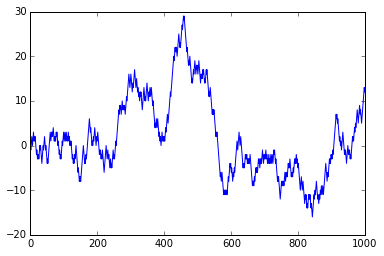

In [134]:
plt(walk)

In [135]:
nsteps = 1000

In [136]:
draws = np.random.randint(0, 2, size=nsteps)

In [137]:
draws

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0,

In [138]:
steps = np.where(draws > 0 ,1 ,-1)

In [139]:
walk = steps.cumsum()

In [140]:
walk

array([ -1,   0,   1,   0,  -1,  -2,  -1,  -2,  -3,  -4,  -3,  -2,  -3,
        -2,  -1,   0,  -1,   0,  -1,   0,  -1,   0,  -1,  -2,  -1,  -2,
        -3,  -4,  -5,  -6,  -5,  -4,  -5,  -4,  -5,  -6,  -5,  -4,  -3,
        -2,  -3,  -2,  -3,  -2,  -3,  -2,  -3,  -4,  -3,  -4,  -3,  -2,
        -3,  -2,  -1,   0,  -1,  -2,  -1,   0,  -1,  -2,  -3,  -2,  -3,
        -4,  -5,  -6,  -7,  -8,  -9,  -8,  -9, -10, -11, -12, -13, -14,
       -13, -12, -11, -10, -11, -10,  -9, -10, -11, -12, -13, -12, -13,
       -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -5,  -4,  -5,  -4,
        -5,  -6,  -7,  -6,  -7,  -8,  -7,  -6,  -7,  -6,  -5,  -4,  -3,
        -4,  -5,  -6,  -5,  -4,  -5,  -6,  -5,  -6,  -7,  -8,  -7,  -8,
        -7,  -8,  -7,  -6,  -7,  -6,  -5,  -4,  -5,  -4,  -3,  -4,  -3,
        -4,  -3,  -2,  -1,  -2,  -3,  -4,  -3,  -2,  -3,  -2,  -1,  -2,
        -3,  -4,  -3,  -4,  -5,  -4,  -5,  -4,  -5,  -4,  -5,  -6,  -5,
        -6,  -7,  -8,  -9, -10, -11, -12, -13, -14, -13, -14, -1

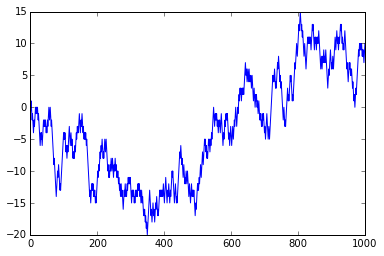

In [141]:
plt(walk)

In [142]:
walk.min()

-20

In [143]:
walk.max()

15

In [144]:
(np.abs(walk) >= 10)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [145]:
(np.abs(walk) >= 10).argmax()

73

### 4.7.1 한 번에 계단 오르내리기 시뮬레이션 하기
계단 오르내리기 1000번을 5000회 시뮬레이션을 해야 한다면

In [146]:
nwalks = 5000

In [147]:
nsteps = 1000

In [148]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps))

In [149]:
steps = np.where(draws > 0, 1, -1)

In [150]:
walks = steps.cumsum(1)

In [151]:
walks

array([[  1,   2,   1, ..., -14, -13, -14],
       [  1,   2,   3, ..., -24, -23, -22],
       [ -1,   0,  -1, ..., -16, -15, -14],
       ..., 
       [ -1,   0,   1, ...,  14,  13,  12],
       [  1,   2,   3, ...,  44,  45,  46],
       [ -1,   0,   1, ..., -12, -13, -12]])

In [152]:
walks.shape

(5000, 1000)

In [153]:
walks.min(), walks.max()

(-116, 115)

In [154]:
hits30 = (np.abs(walks) >= 30).any(1)

In [155]:
hits30

array([False, False, False, ..., False,  True, False], dtype=bool)

In [156]:
hits30.sum()

3350

In [157]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [158]:
crossing_times

array([169, 375, 273, ..., 447, 245, 399])

In [159]:
walks[hits30]

array([[ -1,   0,  -1, ...,  54,  55,  54],
       [ -1,  -2,  -1, ..., -12, -13, -12],
       [  1,   2,   1, ..., -52, -51, -52],
       ..., 
       [  1,   0,   1, ...,   0,  -1,   0],
       [ -1,  -2,  -3, ..., -14, -15, -16],
       [  1,   2,   3, ...,  44,  45,  46]])

In [160]:
crossing_times.mean()

501.17313432835823

In [167]:
draws = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))

In [168]:
draws

array([[-0.11536962,  0.33713748,  0.06760606, ..., -0.14319752,
        -0.10907015,  0.32356001],
       [-0.01078194,  0.02646056, -0.04484143, ..., -0.63016759,
        -0.16182192, -0.23467937],
       [ 0.50682198, -0.29028919,  0.4159275 , ..., -0.00719188,
        -0.0408794 ,  0.06312876],
       ..., 
       [ 0.07130539, -0.08898926,  0.16807809, ..., -0.17753217,
         0.58976794, -0.01295841],
       [ 0.2197567 , -0.31456052, -0.01204953, ..., -0.08031471,
        -0.10731522, -0.31941641],
       [-0.12707843,  0.32400847,  0.31474565, ..., -0.02079318,
        -0.29068916, -0.00483013]])

In [169]:
draws.shape

(5000, 1000)

In [170]:
steps = np.where(steps > 0, 1, -1)

In [171]:
walks = steps.cumsum(1)

In [174]:
walks.min(), walks.max()

(-137, 128)